In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('crime_data.csv')

# Display the first few rows
data.head()

,States/UTs,District,Year,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Rape,Custodial Rape,Custodial_Gang Rape,...,Offences promoting enmity between different groups,Promoting enmity between different groups,"Imputation, assertions prejudicial to national integration",Extortion,Disclosure of Identity of Victims,Incidence of Rash Driving,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total Cognizable IPC crimes
0,Andhra Pradesh,Anantapur,2014,134,171,8,0,35,0,0,...,0,0,0,0,0,1038,0,0,3800,8376
1,Andhra Pradesh,Chittoor,2014,84,170,2,0,32,0,0,...,0,0,0,19,0,249,0,0,2567,5374
2,Andhra Pradesh,Cuddapah,2014,80,162,1,0,28,0,0,...,0,0,0,0,0,948,0,0,2604,5803
3,Andhra Pradesh,East Godavari,2014,64,84,2,0,85,0,0,...,0,0,0,32,0,39,0,0,3791,7630
4,Andhra Pradesh,Guntakal Railway,2014,14,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,37,490


In [31]:
# Summarize data
print('Data Shape:', data.shape)
print('\nData Info:')
data.info()

# Check for missing values
print('\nMissing Values:')
print(data.isnull().sum().sum())

# Descriptive statistics
print('\nDescriptive Statistics:')
data.describe()

Data Shape: (838, 91)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 91 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   States/UTs                                                        838 non-null    object
 1   District                                                          838 non-null    object
 2   Year                                                              838 non-null    int64 
 3   Murder                                                            838 non-null    int64 
 4   Attempt to commit Murder                                          838 non-null    int64 
 5   Culpable Homicide not amounting to Murder                         838 non-null    int64 
 6   Attempt to commit Culpable Homicide                               838 non-null    int64 
 7   Rape      

,Year,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Rape,Custodial Rape,Custodial_Gang Rape,Custodial_Other Rape,Rape other than Custodial,...,Offences promoting enmity between different groups,Promoting enmity between different groups,"Imputation, assertions prejudicial to national integration",Extortion,Disclosure of Identity of Victims,Incidence of Rash Driving,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total Cognizable IPC crimes
count,838.0,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,...,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,2014.0,81.465394,99.995227,7.992840,10.431981,92.310263,0.474940,0.016706,0.458234,91.835322,...,0.804296,0.773270,0.031026,19.594272,0.322196,978.178998,1.732697,2.739857,2253.233890,6823.243437
std,0.0,302.341738,419.969968,52.272628,71.473497,342.630462,6.756472,0.223383,6.583354,340.440065,...,3.978122,3.828292,0.307597,79.616510,6.396217,4989.771066,9.237483,12.676722,8430.873504,24094.386057
min,2014.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.0,16.000000,11.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,31.250000,0.000000,0.000000,216.000000,947.250000
50%,2014.0,34.500000,31.000000,2.000000,0.000000,35.000000,0.000000,0.000000,0.000000,35.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,186.000000,0.000000,0.000000,791.500000,2571.500000
75%,2014.0,62.750000,65.000000,5.000000,0.000000,70.000000,0.000000,0.000000,0.000000,70.000000,...,0.000000,0.000000,0.000000,12.000000,0.000000,566.500000,0.000000,2.000000,1796.000000,4772.000000
max,2014.0,5150.000000,7355.000000,1412.000000,1433.000000,5076.000000,189.000000,5.000000,184.000000,5076.000000,...,65.000000,59.000000,6.000000,1226.000000,131.000000,108962.000000,150.000000,194.000000,127869.000000,272423.000000


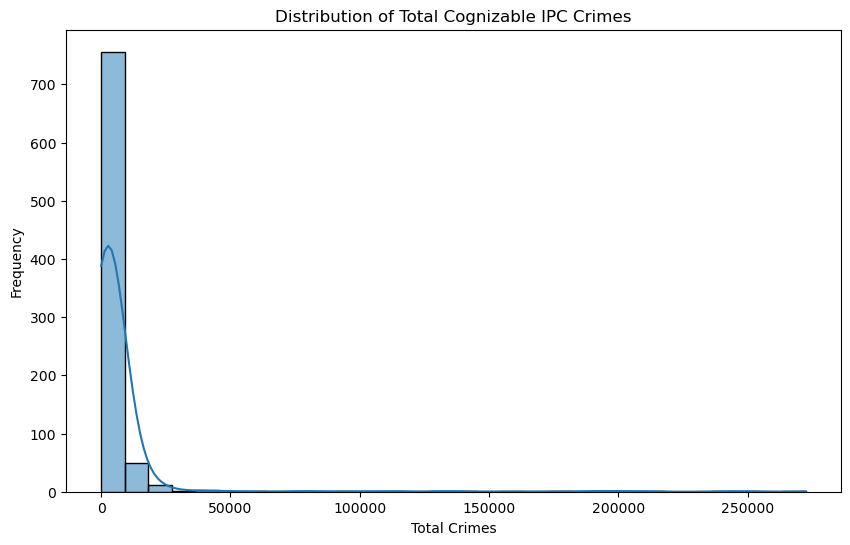

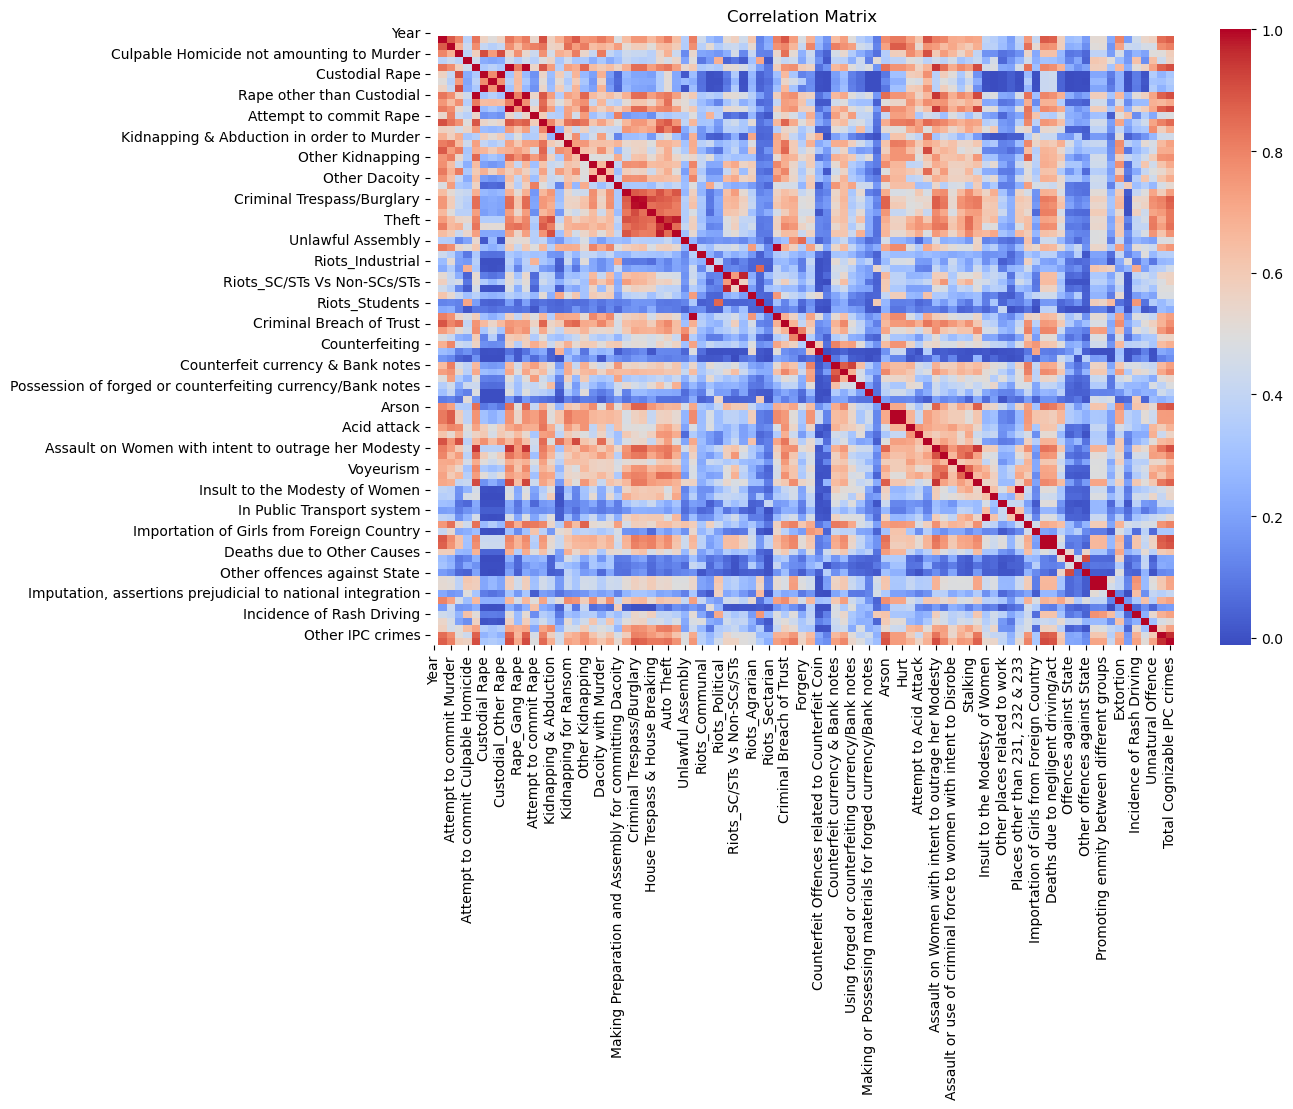

In [33]:
# Visualize distribution of the target variable (Total Cognizable IPC Crimes)
plt.figure(figsize=(10, 6))
sns.histplot(data['Total Cognizable IPC crimes'], bins=30, kde=True)
plt.title('Distribution of Total Cognizable IPC Crimes')
plt.xlabel('Total Crimes')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
corr = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

In [37]:
# Handle missing values (if any)
data = data.fillna(0)  # Replace NaN with 0 for crime counts

# Encode categorical variables
le_state = LabelEncoder()
le_district = LabelEncoder()
data['State_Encoded'] = le_state.fit_transform(data['States/UTs'])
data['District_Encoded'] = le_district.fit_transform(data['District'])

# Define features and target
X = data.drop(['States/UTs', 'District', 'Year', 'Total Cognizable IPC crimes'], axis=1)
y = data['Total Cognizable IPC crimes']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

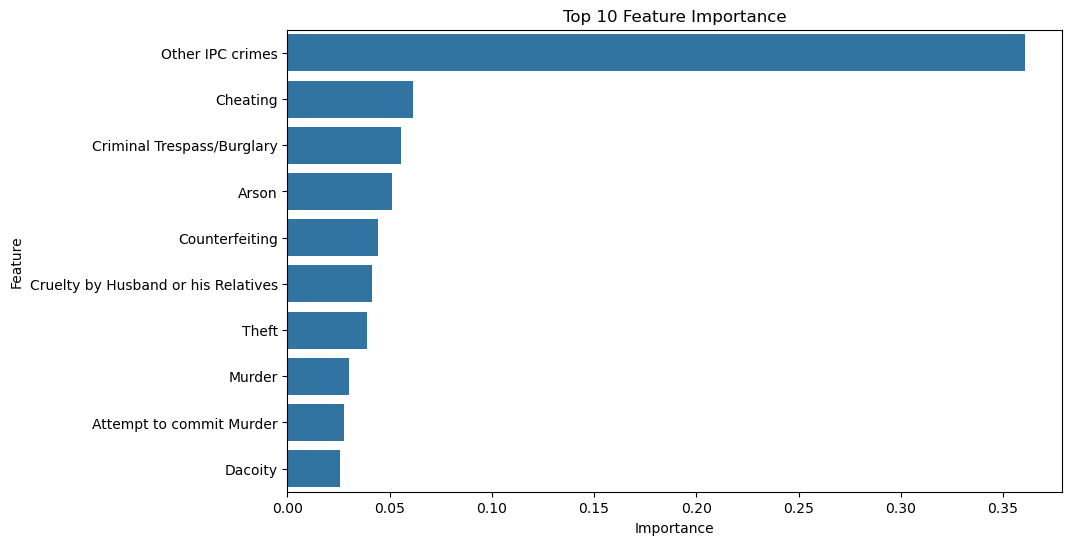

In [39]:
# Create a new feature: Total Violent Crimes
violent_crimes = ['Murder', 'Attempt to commit Murder', 'Rape', 'Kidnapping & Abduction_Total', 'Dacoity', 'Robbery']
data['Total_Violent_Crimes'] = data[violent_crimes].sum(axis=1)

# Update features
X = data.drop(['States/UTs', 'District', 'Year', 'Total Cognizable IPC crimes'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature importance using Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression

# Baseline model: Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [43]:
# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print('Linear Regression:')
print(f'MSE: {mse_lr:.2f}')
print(f'RMSE: {rmse_lr:.2f}')
print(f'R² Score: {r2_lr:.2f}')

print('\nRandom Forest:')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'R² Score: {r2_rf:.2f}')

# Cross-validation for Random Forest
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='r2')
print('\nRandom Forest Cross-Validation R² Scores:', cv_scores)
print(f'Mean CV R²: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

Linear Regression:
MSE: 0.00
RMSE: 0.06
R² Score: 1.00

Random Forest:
MSE: 66245176.56
RMSE: 8139.11
R² Score: 0.92

Random Forest Cross-Validation R² Scores: [0.93964603 0.77566304 0.94899707 0.88187625 0.9278099 ]
Mean CV R²: 0.89 ± 0.06
